# Try-It 7.1: Plotting Mean Variance in Python



**IMPORTANT INSTRUCTIONS:** This activity is designed for you to experiment with `Python` code about sampling, variance, and mean. Feel free to change any numerical value throughout the code in the activity to visualize different outcomes and results.

# What is Sampling?
   
When you can't collect data from an entire population, *sampling* is performed to collect a representative *sample* of the whole population. 

There are two main types of *Sampling*: probability *sampling* and non-probability *sampling*.

Probability *sampling* is defined as a sampling technique in which the researcher chooses samples from a larger population using random selection.

Non-probability *sampling* is defined as a sampling technique in which the researcher selects *samples* based on the subjective judgment of the researcher rather than random selection. 



| Probability *Sampling* | Non-Probability *Sampling*| 
| --- | --- | 
| The *samples* are randomly selected.	|*Samples* are selected on the basis of the <br> researcher’s subjective judgment.| 
|Everyone in the population has an equal <br> chance of getting selected.|	Not everyone has an equal chance to <br>participate.|
|Researchers use this technique when they <br> want to reduce *sampling* bias.|	*Sampling* bias is not a concern for <br>the researcher.|
|Used when the researcher wants to create <br> accurate samples.	|This method does not help<br> in representing the population accurately.|
|Finding the correct audience is difficult.	|Finding an audience is very simple.|

## Simple Random Sampling

Simple random *sampling* is the simplest  probability *sampling* techique. As the name suggests, it is an entirely random method of selecting the *sample*.

This *sampling* method is as easy as assigning numbers to the population we want to *sample* and then randomly choosing from those numbers through an automated process.

### Understanding simple random sampling with an example

The population of the United States is **330 million**. It is practically impossible to send a survey to every individual to gather information about the average middle-class income. Instead, we can identify a *sample* of **1 million** people using probability *sampling* to collect data. Sending a survey to 1 million people identified as our sample will help us question a set of citizens that are representative of the broader population and will limit the potential for bias in our sample.

![](./images/sampling.png)

For simplicity, assume that the income of ten middle class people (in thousands of dollars) is:

In [1]:
import numpy as np
sample_income = np.array([56, 67, 76, 83, 59, 77, 84, 52, 66, 83])

Below, we have define a *function*, `mean` that compute the mean using the formula:
    
$$\mu_x = \frac{\sum{x_n}}{N},$$

where $x_n$ are the samples and $N$ is the number of *samples*.

In [2]:
def mean(samples):
    m = sum(samples)/len(samples)
    return m

Then the mean of the *list* `income` has variance:

In [3]:
mean(sample_income)

70.3

The mean can also be computed using the *function* `mean` from `NumPy`

In [4]:
m = sample_income.mean()
m

70.3

The formula to compute the variance is given by:
    
$$\text{var} = \text{mean}(\text{abs}(x - x_n)^2))$$

Below, we have defined a *function*, `variance`, to compute the variance of a *sample* using the formula above:

In [6]:
def variance(samples):
    mean = sum(samples)/len(samples)
    tot = 0.0
    for x in samples:
        tot = tot + (x - mean)**2
    return tot/len(samples)

In [7]:
variance(sample_income)

128.41

The variance can be computed using the *function* `var` from `NumPy`

In [8]:
v = sample_income.var()
v

128.41

Consider now defining an *array*, `population_income`, which has more elements than `sample_income`.

What are the mean and the variance of this new *array*?

In [92]:
# Use this code cell to define your population sample and to compute its mean and variance.

population_income = np.array([56, 67, 76, 83, 59, 77, 84, 52, 66, 83, 
                            71, 62, 88, 92, 58, 69, 75, 81, 63, 79,
                            85, 61, 73, 87, 64, 78, 82, 57, 70, 86,
                            74, 60, 80, 89, 65, 76, 84, 55, 72, 88,
                            68, 81, 90, 62, 77, 85, 59, 73, 87, 66])
mean(population_income), variance(population_income)


(73.5, 118.49)

## Plotting the Mean and the Variance


Suppose now that we are interested in plotting the mean and the variance of a population and a *sample* of it.

Below, we import the necessary libraries and generate a population with 500 points

In [93]:
import matplotlib.pyplot as plt
import scipy.stats as sp

Npoints = 500

We are going to *sample* the population multiple times. This is done to acheve more accurate results.

First, we will define empty lists where the means and the variances of the populations and the *samples* will be stored.

In [94]:
diff_mean = []
diff_var = []
best_mean = []
best_var = []

Next, we generate 500 points between 50 and 100 to represent the income of a randome middle-class population.

We then compute the mean and the variance.

In [95]:
population  = np.random.uniform(50,100,Npoints)

m = population.mean()
v = np.var(population)

We choose to *sample* the population 55 times.

In [96]:
n_sampling = 55

Finally, we use a *for loop* to compute the mean and the variance of `sample_size`.

In [97]:
for n in range(n_sampling):
    sample = np.random.choice(population,50)
    sample_mean = sample.mean()
    sample_var = np.var(sample, ddof = 0)
    
    diff_mean.append(m - sample_mean)
    diff_var.append(v - sample_var)
    best_mean.append(np.sum(diff_mean)/(len(diff_mean)))
    best_var.append(np.sum(diff_var)/(len(diff_var)))
    
len(best_mean)

55

### Plotting

Now we can plot our results:

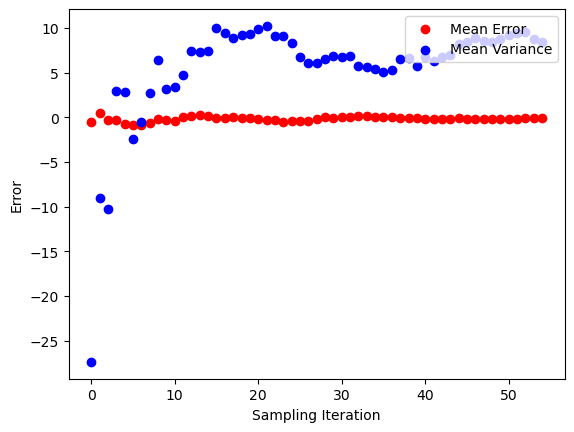

In [98]:
plt.scatter(range(n_sampling), best_mean, color = 'r', label  = 'Mean Error')
plt.scatter(range(n_sampling), best_var, color = 'b', label  = 'Mean Variance')
plt.ylabel('Error')
plt.xlabel('Sampling Iteration')
plt.legend(loc = 'upper right')

Feel free to modify all the variables above to see how the results change.